<div style="text-align: center;"><div  style="color:#7f0000; font-size:18px; font-weight:bold; line-height:30px;">Task 1: Supervised Learning (Predict the percentage of an student based on the no. of study hour)</div></div>
<div style="text-align: left; color:#006666; font-size:18px;line-height:30px;"><strong>By : </strong>Sapna Singh</div> 

#### Data Description 
* Hours : No of study hours 
* Scores: Percentage scored by student 

### Step 1 : Import important libraries 

In [1]:
import numpy as np # mathematical fun
import pandas as pd # manipulating data 
import matplotlib.pyplot as plt # data visualizayion
import seaborn as sns # data Visulaization 
import warnings 
warnings.filterwarnings("ignore") 

### Step 2 : Load data 

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)## importing data from the url 

In [3]:
data.head() # loading top 5 rows of our data set 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail() # loading bottom 5 rows 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.isnull().sum()# looking for missing values 

Hours     0
Scores    0
dtype: int64

In [6]:
data.shape

(25, 2)

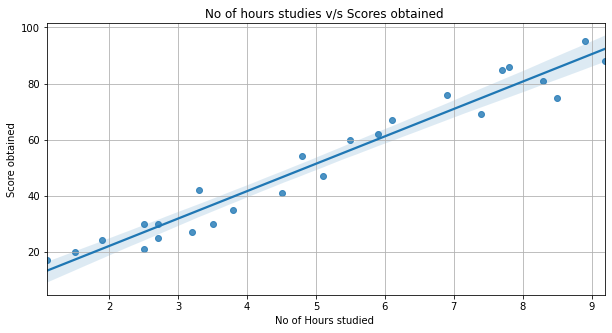

In [7]:
# Let's visualise our data 
plt.figure(figsize=(10,5))
sns.regplot(x="Hours", y="Scores", data=data )
plt.xlabel("No of Hours studied ")
plt.ylabel("Score obtained")
plt.title("No of hours studies v/s Scores obtained ")
plt.grid()
plt.show()


We can see from the plot that score obtained by student increase as study hours increases. 

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step 3: Build our model 

In [9]:
X = data[["Hours"]]
y= data[["Scores"]]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=100)

In [12]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()

In [15]:
lr=lr.fit(X_train,y_train)

In [16]:
y_pred=lr.predict(X_test)

In [17]:
X_test

,Hours
9,2.7
22,3.8
13,3.3
11,5.9
5,1.5


In [18]:
y_pred

array([[28.54512294],
       [39.36411177],
       [34.44638957],
       [60.01854497],
       [16.74258969]])

## Plotting Train,test and predicted score

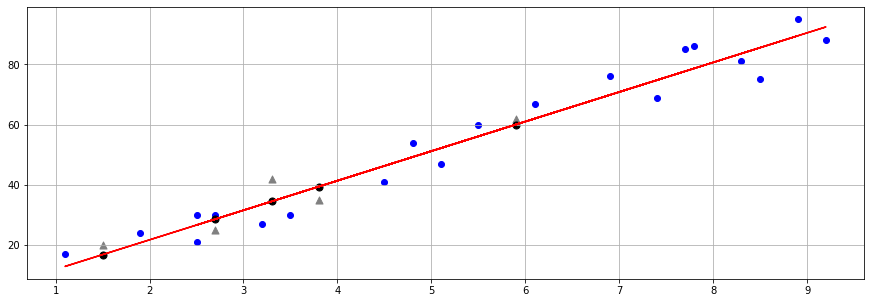

In [22]:
plt.figure(figsize = (15,5))
plt.plot(X_train, lr.predict(X_train),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='grey',marker="^" , s= 50)
plt.scatter(X_test, lr.predict(X_test),  color='black', s=50)    # y_pred = lm.predict(test)  -- Test  data 
plt.grid()
plt.show()

## Testing what will be the percentage if study hours is 9.25

In [23]:
lr.coef_

array([[9.83544438]])

In [24]:
lr.intercept_

array([1.98942311])

In [25]:
eq_y=lr.intercept_+ lr.coef_*9.25
eq_y

array([[92.96728365]])

In [26]:
from sklearn.metrics import mean_absolute_error,r2_score

In [28]:
rsq=r2_score(y_test,y_pred)
print("R square : ",round(rsq,3))
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error : ",round(mae,3))

R square :  0.905
Mean absolute error :  4.14
